In [4]:
!pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247952 sha256=f06c04715ca20c88d41b6a54c14913d02851b8d43873b7d56e5e253943b4eb66
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import mysql.connector

In [6]:
USER_ID = "ed32b89372f8"
# Define the database connection parameters
db_config = {
    'host': '34.128.108.220',
    'user': 'root',
    'password': 'sehatin-db-password',
    'database': 'sehatin'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# Create a cursor object
cursor = connection.cursor()

# Define your SQL query with a placeholder for the user_id
sql_query = "SELECT * FROM eat_logs WHERE user_id = %s"

# Execute the SQL query with the user_id as a parameter
cursor.execute(sql_query, (USER_ID,))
result = cursor.fetchall()

# Create a DataFrame from the query result
df = pd.DataFrame(result, columns=cursor.column_names)
df['date'] = pd.to_datetime(df['date'])

# Remove 'days' part from 'time' and convert to timedelta
df['time'] = pd.to_timedelta(df['time'].astype(str).str.replace(' days ', ' ').str.replace(' day ', ' '))

# Combine 'date' and 'time' columns to create 'Timestamp'
df['Timestamp'] = df['date'] + df['time']

# Initialize 'Pesan' column
df['Pesan'] = None
# Display the DataFrame
print(df)

              id       user_id            food    portion  calories  carbs  \
0   a1347b90e57c  ed32b89372f8      Brown Rice      1 cup     215.0  45.08   
1   b0218f50d96a  ed32b89372f8           Tempe      1 ons      55.0   9.39   
2   c2596d78f23e  ed32b89372f8  Chicken Breast      4 ons     187.0   0.00   
3   d3850e14a79f  ed32b89372f8        Broccoli      1 cup      55.0  11.20   
4   e4931f67b02d  ed32b89372f8          Salmon      6 ons     367.0  12.00   
5   f5062c89d31a  ed32b89372f8            Tahu   100 gram      80.0   1.90   
6   g6173a82e54b  ed32b89372f8        Kangkung   200 gram      28.0   3.90   
7   g7Hj2fR4kL1q  ed32b89372f8    Ikan Kembung    85 gram     142.0   7.96   
8   l6Dx8zK2cY7v  ed32b89372f8         Lontong   1 potong     130.0  28.58   
9   p3Aq1C5vZ2bX  ed32b89372f8     Telur Dadar     1 gram     153.0   0.69   
10  t9Wp5bV0mN3o  ed32b89372f8           Oncom  1 mangkok      97.0   7.17   
11  u2Ov9T4gH1sR  ed32b89372f8      Bakso Ayam   108 gram     17

In [8]:


# 4. Masukkan nama file/pathnya ke sini(MODELNYA NANTI DI DEPLOY KE GCP)
model = tf.keras.models.load_model('/content/lstm_model - Final.h5')

id                    object
user_id               object
food                  object
portion               object
calories             float64
carbs                float64
prots                float64
fats                 float64
message               object
date          datetime64[ns]
time         timedelta64[ns]
image_url             object
Timestamp     datetime64[ns]
Pesan                 object
dtype: object
              time       date  carbs  prots
0  0 days 13:46:46 2023-12-16  45.08   5.03
1  0 days 17:26:56 2023-12-15   9.39  18.54
2  0 days 14:46:46 2023-12-18   0.00  39.30
3  0 days 15:58:43 2023-12-19  11.20   3.70
4  0 days 16:58:43 2023-12-17  12.00  40.60
5  0 days 05:11:31 2023-12-21   1.90  10.90
6  0 days 16:23:35 2023-12-20   3.90   3.40
7  0 days 19:23:35 2023-12-22   7.96   0.00
8  0 days 15:10:31 2023-12-24  28.58   2.49
9  0 days 20:30:21 2023-12-24   0.69  10.62
10 0 days 10:26:27 2023-12-23   7.17   8.39
11 0 days 19:29:38 2023-12-26   7.49  20.94


<ipython-input-9-92c35612c62b>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = df.resample('D').sum()  # Change 'sum' to 'mean', etc. as needed


1/1 [==============================] - 1s 1s/step
[[[-8.57575989e+00 -5.31398058e-01 -3.46100062e-01  7.07510114e-03]
  [-8.66473579e+00  6.17545843e-02  1.04590535e-01  1.24823898e-01]
  [-4.90672541e+00 -7.84066916e-02 -1.39424741e-01  7.36097097e-02]
  [ 1.09579178e+02  2.30598297e+01  2.29651089e+01  2.29462929e+01]
  [ 6.25583410e-01  8.70683253e-01  3.09691131e-01  4.30034310e-01]
  [ 4.25083733e+00  4.15206480e+00  3.99194145e+00  3.67840505e+00]
  [-1.63769090e+00 -4.61741090e-01  2.70519033e-03  1.79993987e-01]]]
(1, 7, 4)


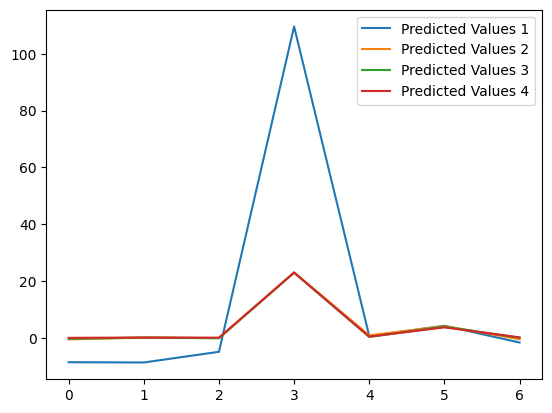

In [9]:
# Check the data types of columns
df[['calories', 'carbs', 'prots', 'fats']].astype(float)
print(df.dtypes)

# Convert 'Tanggal' column to datetime format (if not already)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Displaying the DataFrame
print(df[['time', 'date', 'carbs', 'prots']])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data by day and calculate the sum (or mean, etc.)
daily_data = df.resample('D').sum()  

# Reset the index
daily_data.reset_index(inplace=True)

# Extract the time series columns
series = daily_data[['calories', 'carbs', 'prots', 'fats']].values

# Assuming 'series' contains your data with shape (n, 4)
# where 'n' is the number of rows

desired_sequence_length = 250
number_of_features = 4

# Pad or slice 'series' to achieve a length of 250 rows
if len(series) < desired_sequence_length:
    # Pad the series with zeros to reach the desired length
    padded_data = np.zeros((desired_sequence_length, number_of_features))
    padded_data[-len(series):, :] = series  # Fill in the data at the end of the padded array
else:
    # Take the last 250 rows if there are more than 250 rows
    padded_data = series[-desired_sequence_length:, :]

# Reshape the padded data to match the expected shape
reshaped_data = padded_data.reshape((1, desired_sequence_length, number_of_features))

# Now, 'reshaped_data' has the shape (1, 250, 4)
# You can use this reshaped data to make predictions using your trained model
predicted_values = model.predict(reshaped_data)
print(predicted_values)
print(predicted_values.shape)

# Create a new figure
plt.figure()

# Plot each column of the predicted values as a separate line
for i in range(predicted_values.shape[2]):
    plt.plot(predicted_values[0, :, i], label=f'Predicted Values {i+1}')

# Add a legend
plt.legend()

# Display the plot
plt.show()